# STUDENT PERFORMANCE INDICATOR 

### LIFE CYCLE OF MACHINE LEARNING PROJECT

- Understanding the project
- Data collection
- Data Checks to perform
-Exploratory Data analysis
- Model Training
- Choose Model 

### 1. Problem Statement

- This project shows the effect of variables like gender, ethnicity and other affects the scores of students.

### 2. Data Collection

- Data source: https://www.kaggle.com/dataset/spscientist/students-performance-in-exams?datasetid=74977

- Data consist od 8 columns and 1000 rows

### Importation of data and packages

#### importing pandas, numpy, seaborn, matplotlib

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Reading the data

In [6]:
df=pd.read_csv('data/stud.csv')

In [7]:
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
df.shape

(1000, 8)

### Data checks
1. Missing values
2. Duplicate values
3. check data type
4. check number of unique values
5. Check statistics of data
6. Check for various categories present in data

### 2.1 Checking for missing values

In [13]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

Observation 1
There are no nissing values

#### Checking for Duplicates

In [14]:
df.duplicated().sum()

0

Observation 2
- There are no duplicates

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Observation 3
- There are five columns which are object based data while only three are numeric data

### Checking for unique values

In [15]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

Observation 4
- There are two genders, 5 race_ethnicity, 6 parental level of education, two types of lunch, two types of preparation

In [10]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Observation 5.
- Every statistical data for all the subjects considered are close except fpr mini
- Among all subjects , Maths has the poorest score of 0

### EDA

In [11]:
df[df['math_score']==0]

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
59,female,group C,some high school,free/reduced,none,0,17,10


Observation 6.
- Only one person had zero. the person is a female 

#### Printing out the categorical variable

In [16]:
df.head(3)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


In [19]:
print(" catergorical variables in gender is: ", end=" "  )
print(df['gender'].unique())

print(" catergorical variables in race_ethnicity is: ", end=" "  )
print(df['race_ethnicity'].unique())

print(" catergorical variables in parental_level_of_education is: ", end=" "  )
print(df['parental_level_of_education'].unique())

print(" catergorical variables in lunch is: ", end=" "  )
print(df['lunch'].unique())

print(" catergorical variables in test_preparation_course is: ", end=" "  )
print(df['test_preparation_course'].unique())

 catergorical variables in gender is:  ['female' 'male']
 catergorical variables in race_ethnicity is:  ['group B' 'group C' 'group A' 'group D' 'group E']
 catergorical variables in parental_level_of_education is:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
 catergorical variables in lunch is:  ['standard' 'free/reduced']
 catergorical variables in test_preparation_course is:  ['none' 'completed']


Observation 7
- The two genders are female and male
- Race/ ethnicity are from group A to group E
- Parental level of Education  includes bachelors degree, some college, masters degree, assocoate degree, high school and some high school.
- types of lunch includes standard lunch or free and reduced
- level of testpreparation is none and comleted

### To seperate the categorical feature from the numerical feature

In [25]:
numeric_feature= [feature for feature in df.columns if df[feature].dtype !='O']
categorical_feature= [feature for feature in df.columns if df[feature].dtype =='O']

print(" The numerical features are {}  and the number of nueric features are {}".format(numeric_feature, len(numeric_feature)))
print(" The categorical feature are {} and the number of categorical values are {}".format(categorical_feature, len(categorical_feature)))

 The numerical features are ['math_score', 'reading_score', 'writing_score']  and the number of nueric features are 3
 The categorical feature are ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course'] and the number of categorical values are 5


#### Adding columns for total score and average score

In [28]:
df['Total_score']=df.apply(lambda x: x.math_score + x.reading_score + x.writing_score, axis=1)

In [29]:
df.head(3)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278


### Adding the average score column

In [30]:
df['average_score']=df.apply(lambda x: (x.Total_score/3), axis=1)

In [31]:
df.head(3)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667


### Finding students with higest scores in maths reading and writting

In [41]:
math_val=df[df['math_score']==df['math_score'].max()].count()['math_score']
reading_val=df[df['reading_score']==df['reading_score'].max()].count()['reading_score']
writing_val=df[df['writing_score']==df['writing_score'].max()].count()['writing_score']

print("Total number of students with the highest score in maths which is 100 recent is: " + str(math_val))
print("Total number of students with the highest score in reading which is 100 recent is: " + str(reading_val))
print("Total number of students with the highest score in writting which is 100 recent is: " + str(writing_val))

Total number of students with the highest score in maths which is 100 recent is: 7
Total number of students with the highest score in reading which is 100 recent is: 17
Total number of students with the highest score in writting which is 100 recent is: 14


Observation 8
- more(14) students had higest scores in reading followed by writing (14). while math seems to be the most challenging for all students.

### Finding students with lowest marks

In [42]:
math_val_low=df[df['math_score']==df['math_score'].min()].count()['math_score']
reading_val_low=df[df['reading_score']==df['reading_score'].min()].count()['reading_score']
writing_val_low=df[df['writing_score']==df['writing_score'].min()].count()['writing_score']

print("Total number of students with the lowest score in maths which is 100 recent is: " + str(math_val_low))
print("Total number of students with the lowest score in reading which is 100 recent is: " + str(reading_val_low))
print("Total number of students with the lowest score in writting which is 100 recent is: " + str(writing_val_low))

Total number of students with the lowest score in maths which is 100 recent is: 1
Total number of students with the lowest score in reading which is 100 recent is: 1
Total number of students with the lowest score in writting which is 100 recent is: 1


Observation 9 
- Only one person wach had lowest score in each subject

### checking for the details of the ones who failed.

In [43]:
df[df['math_score']==df['math_score'].min()]

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,average_score
59,female,group C,some high school,free/reduced,none,0,17,10,27,9.0


In [44]:
df[df['reading_score']==df['reading_score'].min()]

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,average_score
59,female,group C,some high school,free/reduced,none,0,17,10,27,9.0


In [45]:
df[df['writing_score']==df['writing_score'].min()]

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,average_score
59,female,group C,some high school,free/reduced,none,0,17,10,27,9.0


Observation 10
- It is the same student that had the lowest in all subject

### Finding those that have less than 20% in all subject

In [46]:
math_val_20=df[df['math_score']<=20].count()['math_score']
reading_val_20=df[df['reading_score']<=20].count()['reading_score']
writing_val_20=df[df['writing_score']<=20].count()['writing_score']

print("Total number of students with score 20 and below in maths which is 100 recent is: " + str(math_val_20))
print("Total number of students with score 20 and below in reading which is 100 recent is: " + str(reading_val_20))
print("Total number of students with score 20 and below in writting which is 100 recent is: " + str(writing_val_20))

Total number of students with score 20 and below in maths which is 100 recent is: 4
Total number of students with score 20 and below in reading which is 100 recent is: 1
Total number of students with score 20 and below in writting which is 100 recent is: 3


Observation 11
Maths have the poorest performance followed by writing and then reading

### visualization of data

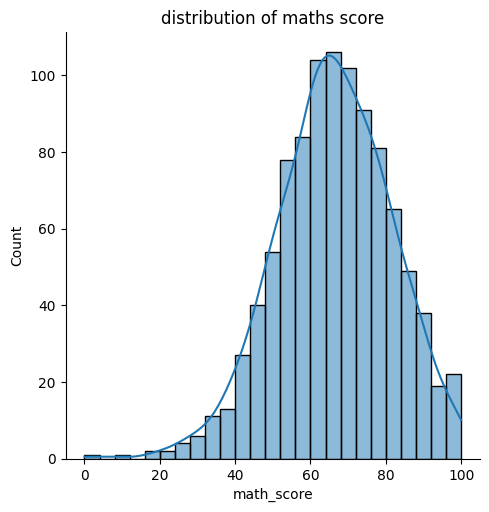

In [93]:
sns.displot(data=df, x=df['math_score'], kde=True).set(title="distribution of maths score")

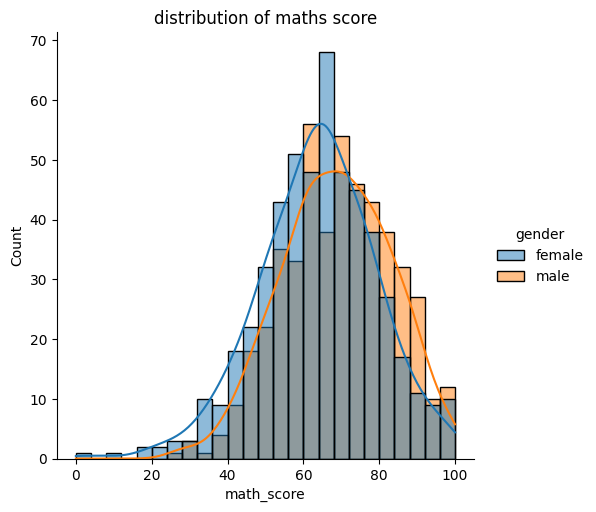

In [89]:
sns.displot(data=df, x=df['math_score'], kde=True, hue='gender').set(title="distribution of maths score")

Observation 12
- More students scored around 66 in maths

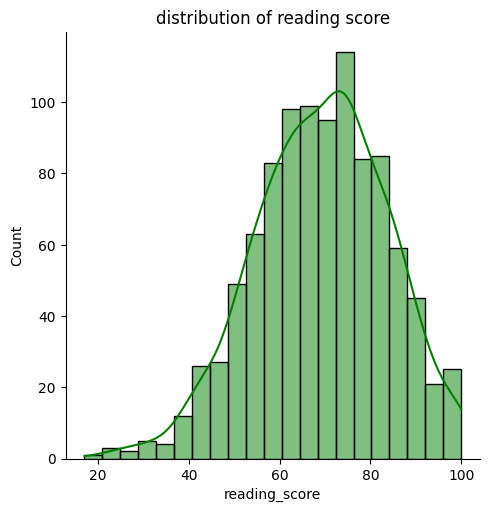

In [92]:
sns.displot(data=df, x=df['reading_score'], kde=True,  color='green').set(title="distribution of reading score")

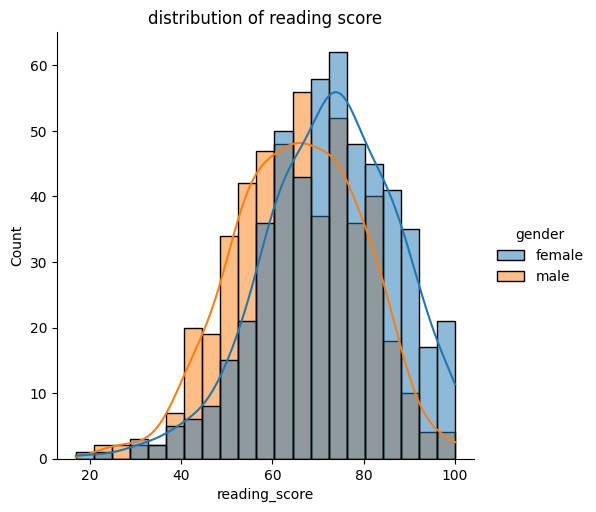

In [90]:
sns.displot(data=df, x=df['reading_score'], kde=True, hue='gender', color='green').set(title="distribution of reading score")

Observation 13
- More people scored above 70 in reading

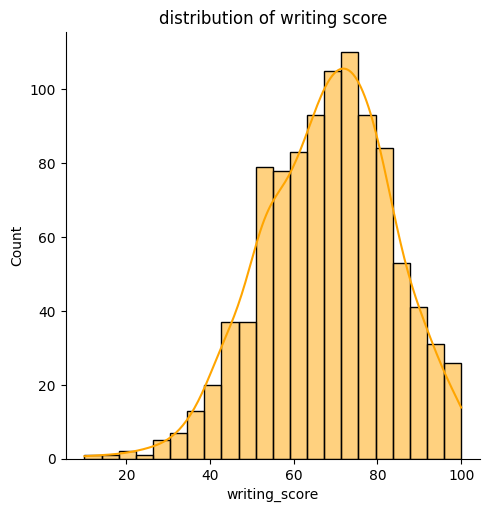

In [91]:
sns.displot(data=df, x=df['writing_score'], kde=True, color='orange').set(title="distribution of writing score")


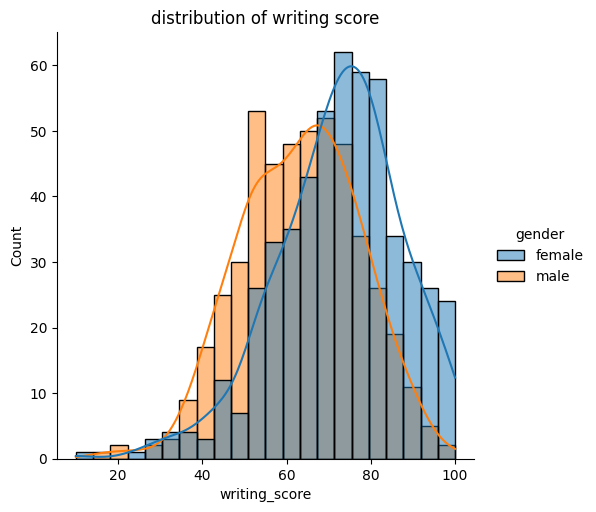

In [94]:
sns.displot(data=df, x=df['writing_score'], kde=True, hue='gender', color='orange').set(title="distribution of writing score")


Observation 14
- More sfemale students did better in the examination

In [95]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'Total_score', 'average_score'],
      dtype='object')

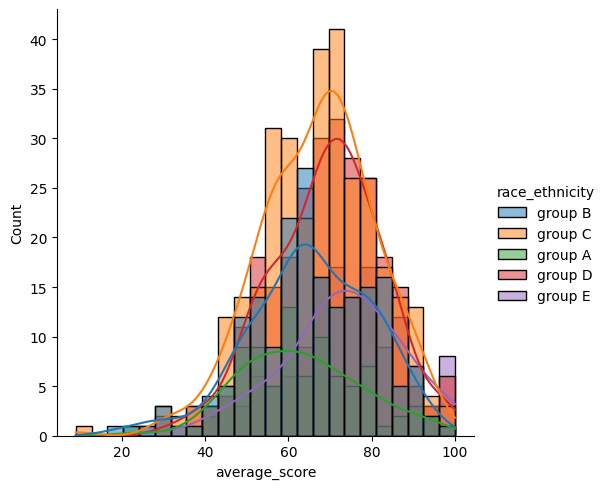

In [99]:
sns.displot(data=df, x=df['average_score'], hue='race_ethnicity', kde=True)

Observation 15
- Race_ ethnic with the highest avberage score is group c followed by group d, then group a while group b is the least 

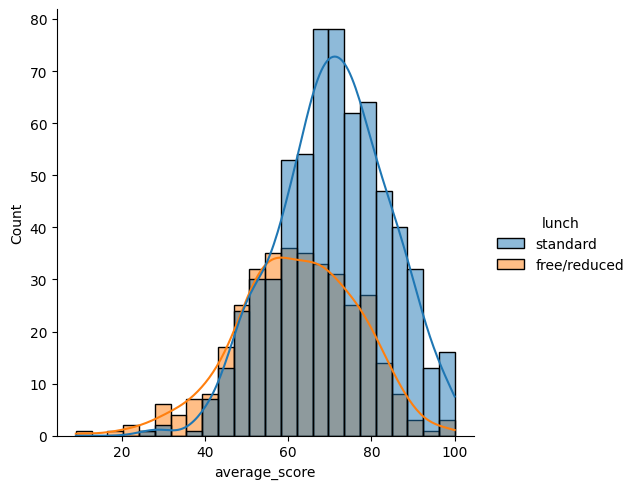

In [100]:
sns.displot(data=df, x=df['average_score'], hue='lunch', kde=True)

observatio 16
- Those with standard lunch performs better

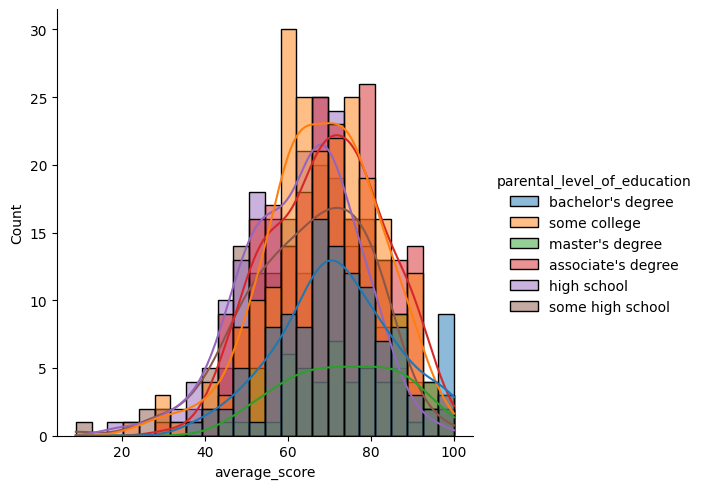

In [101]:
sns.displot(data=df, x=df['average_score'], hue='parental_level_of_education', kde=True)

Observation 17
- The more educated the parents are the less the student do well

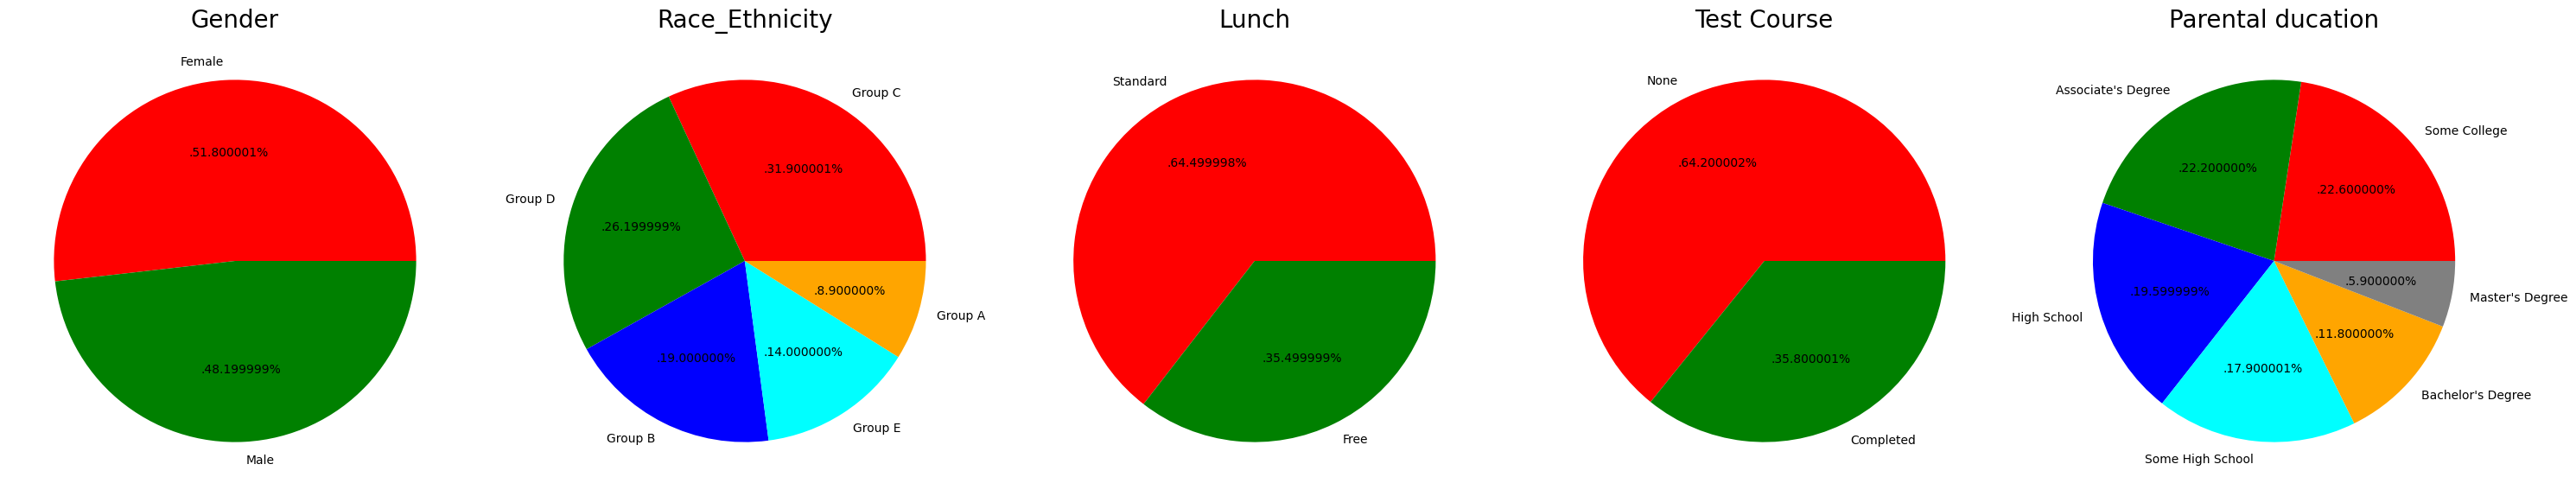

In [103]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race_Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental ducation', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

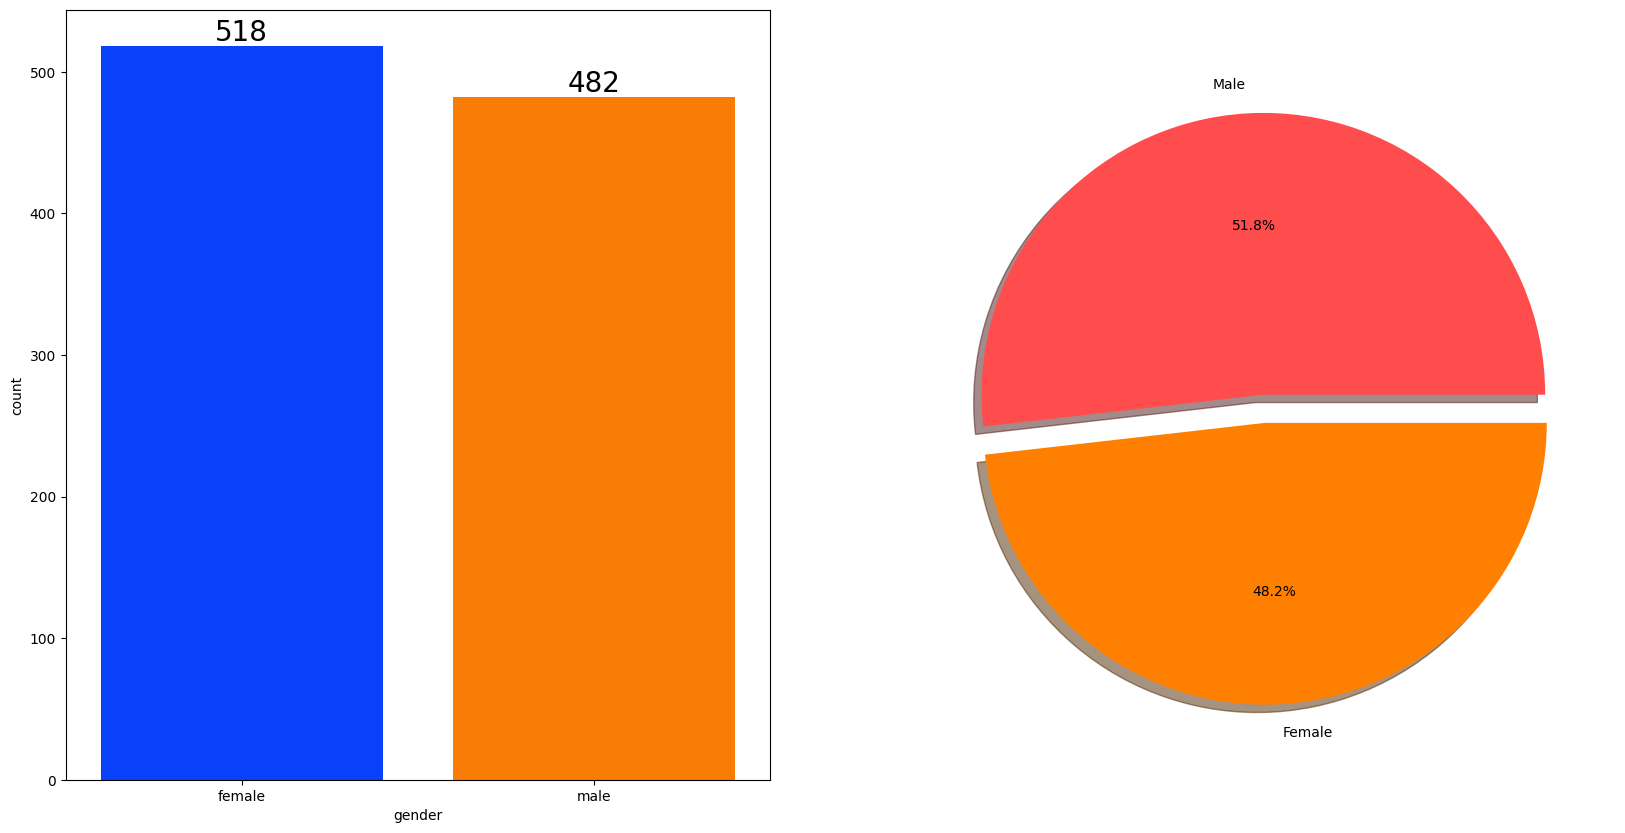

In [104]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

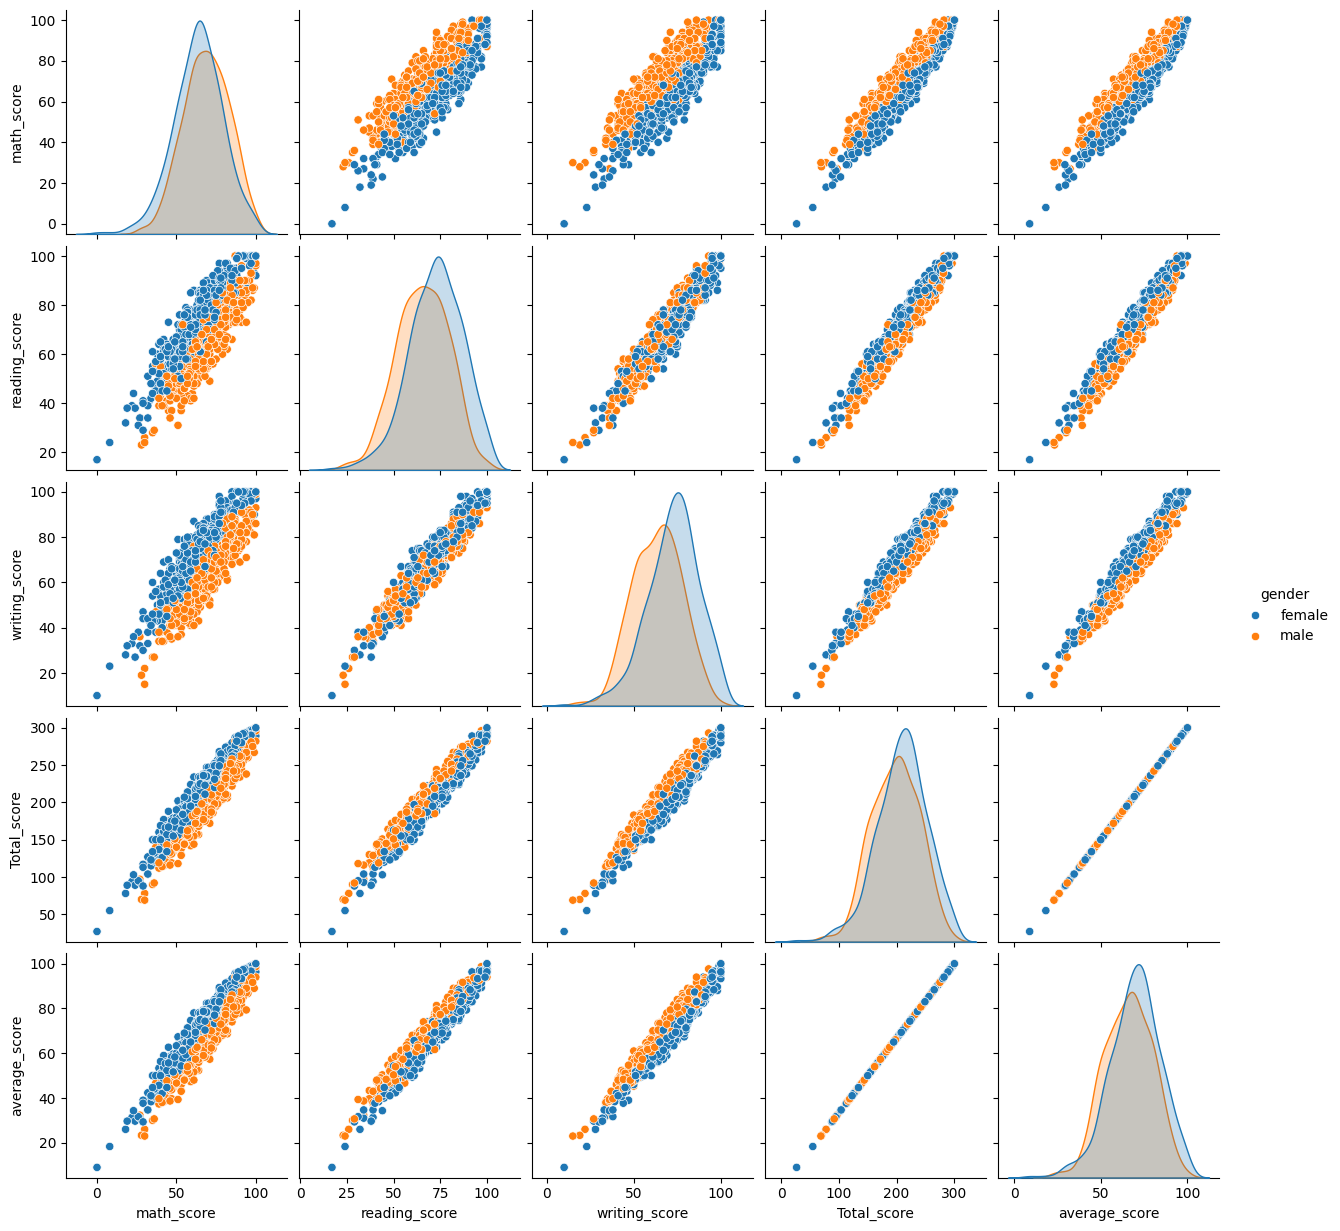

In [105]:
sns.pairplot(df,hue = 'gender')
plt.show()

observation
- From the above plot it is clear that all the scores increase linearly with each other.